In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/TienGiay/'


In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/TienGiay/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('200dong'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('500dong'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('1000dong'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('2000dong'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('5000dong'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('10000dong'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('20000dong'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('50000dong'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('100000dong'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('200000dong'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('500000dong'):
    output = 10
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
#500k(10),200k(9),100k(8),50k(7),20k(6),10k(5),5k(4),2k(3),1k(2),500(1),200(0)
save('11TienGiay_photos.npy', photos)
save('11TienGiay_labels.npy', labels)

(22, 200, 200, 3) (22,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 329.3814 - accuracy: 0.0909
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 12868.0752 - accuracy: 0.0909
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 15465.5352 - accuracy: 0.0909
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 7627.2129 - accuracy: 0.0909
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 4888.2827 - accuracy: 0.0909
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 3444.8796 - accuracy: 0.0909
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 2397.9768 - accuracy: 0.0909
Epoch 8/50
1/1 [==============================] - 2s 2s/step - loss: 1557.4210 - accuracy: 0.0909
Epoch 9/50
1/1 [==============================] - 2s 2s/step - loss: 688.9388 - accuracy: 0.0909
Epoch 10/50
1/1 [==============================] - 2s 2s/step - loss: 286.4987 - accuracy: 0.1818
Epoch 11/50
1/1 [===

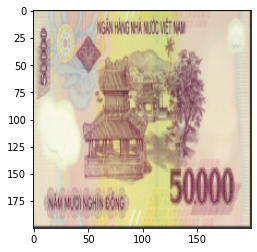

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/TienGiay/50000dong.jpg', target_size=(200,200))
plt.imshow(img)


In [ ]:
classes = ["200dong","500dong","1000dong","2000dong","5000dong","10000dong","20000dong","50000dong","100000dong","200000dong","500000dong"]

In [ ]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.09575417 0.09444933 0.09789476 0.08486686 0.08697341 0.10282946
  0.07185692 0.11706829 0.07765363 0.10768455 0.0629686 ]]


'50000dong'

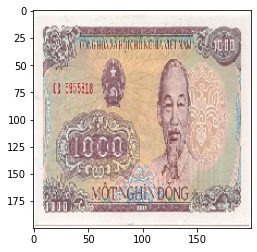

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('1k.jpeg', target_size=(200,200))
plt.imshow(img)


In [ ]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.1061165  0.10489744 0.11056713 0.07436989 0.0776085  0.09534951
  0.08451044 0.08428503 0.08820138 0.10832167 0.06577247]]


'1000dong'